In [1]:
# Description of this project : https://app.greenhouse.io/tests/4ad463c48a868a21bf6d95672de555af

# The main goal of this project is to identify the factors of importance that are necessary for a user to be categorized
# as 'adopted'. I will be doing the prinary EDA for both the .csv files just to get a feel of the data and to understand the
# user base and from these two, will create a consolidated .csv file which will then be used as a dataset for ML 
# application. 

# to show all results in a cell, instead of only the last result 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# all other imports
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import chardet
from collections import defaultdict
import copy
from datetime import date
import seaborn as sns
import datetime
import math
from datetime import date
import calendar
import scipy as sc
from scipy import stats
import h2o # we will be using an algorithm called Distributed Random Forests

# https://jrogel.com/python-3-pandas-encoding-issues/
def find_encoding(fname):
    r_file = open(fname, 'rb').read()
    result = chardet.detect(r_file)
    charenc = result['encoding']
    return charenc

In [2]:
# EDA of takehome_users-intern.csv file 

# This csv file has general data on all users in this time frame, irrespective of whether they are adopted users or not

my_encoding = find_encoding('takehome_users-intern.csv')
df_users = pd.read_csv('takehome_users-intern.csv', encoding=my_encoding)

df_users.head(10)

# shape to get the entire shape of dataframe, irrespective of whether some are NaN or not. 
print('The shape of this dataframe : ', df_users.shape)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,email_domain
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,yahoo.com
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,gustr.com
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,gustr.com
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,yahoo.com
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,yahoo.com
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,yahoo.com
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN,jourrapide.com
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN,yahoo.com
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN,hotmail.com
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,gustr.com


The shape of this dataframe :  (12000, 11)


In [3]:
# count will show the count of each variable (excludes NaN values)
print('Count results : ')
df_users.count() 

# two columns have missing values/ encoded as NaN in the dataframe 
# invited_by_user_id : can take NaNs since some users are not invited to sign up for Asana; these people sign up 
# on their own.
# last_session_creation_time : unix timestamp of last login; not sure why they can take NaNs/ why are they missing?

# nunique will show the number of unique values in each of the columns. 
print('Unique values result : ')
df_users.nunique()

# Analyze each of the variables. 

# This cell will be referenced later in other cells. 

Count results : 


object_id                     12000
creation_time                 12000
name                          12000
email                         12000
creation_source               12000
last_session_creation_time     8823
opted_in_to_mailing_list      12000
enabled_for_marketing_drip    12000
org_id                        12000
invited_by_user_id             6417
email_domain                  12000
dtype: int64

Unique values result : 


object_id                     12000
creation_time                 11996
name                          11355
email                         11980
creation_source                   5
last_session_creation_time     8821
opted_in_to_mailing_list          2
enabled_for_marketing_drip        2
org_id                          417
invited_by_user_id             2564
email_domain                   1184
dtype: int64

array([ 11,   1,  94, 193, 197,  37,  74, 302, 318,  69, 130, 254,   0,
       175, 211,   2,  58,  54,   7,   6, 123,  81,  56, 134,  92, 251,
       283,  98, 401,  33,  59, 109, 276, 208, 332,  64, 235,  63,  14,
         4, 127,  32, 224, 304,  61,  51, 229,  88, 325, 150, 347, 203,
        21, 409, 215, 141,   5, 107, 184, 310, 367, 389,  89, 242,  68,
        16,  49, 185,  91, 172,   8,  43, 249,  26, 139,  70,  10, 252,
        53, 119,   3, 196, 335, 375, 303, 307,  25, 370,  83,  27, 306,
       118, 295,  19, 301, 100, 112, 263,  39,  12,  86, 402,  42, 103,
       373, 268,  30, 406,  48, 313,   9, 138, 261,  35, 264,  95,  55,
        60, 234,  28, 410, 170, 374,  15,  17, 364,  62, 244, 342, 225,
       121, 255, 411, 217, 165, 415, 104, 329, 278, 116, 151, 290, 200,
       187, 122, 353, 135, 328,  36,  13, 341, 349, 198, 153, 108,  77,
       142, 275, 176,  87, 191, 102, 245, 154, 218, 385,  76, 321, 159,
       371,  50,  75, 333, 137, 292, 286, 131, 178, 213, 376, 36

True

0     319
1     233
2     201
3     168
4     159
6     138
5     128
9     124
7     119
10    104
8      97
14     87
11     75
12     75
17     74
Name: org_id, dtype: int64

Text(0.5,0,'org_id')

Text(0,0.5,'count')

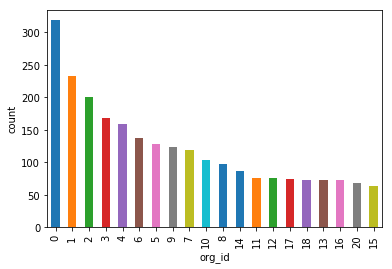

In [4]:
# Analyze 'org_id'
# there are 417 unique org ids - no NaN values

# show unique values of 'org_id'
df_users['org_id'].unique()

# Does the 'org_id' column has all integervalues in the range [0,416]?

set(df_users['org_id'].unique()) == set(range(417))

df_users['org_id'].value_counts().head(15)
# Org 0 has most number of users : 319/12000
# these are almost in a sorted order - probably preference in the org_id is set by Asana

df_users['org_id'].value_counts().head(20).plot(kind='bar')
plt.xlabel('org_id')
plt.ylabel('count')

array(['GUEST_INVITE', 'ORG_INVITE', 'SIGNUP', 'PERSONAL_PROJECTS',
       'SIGNUP_GOOGLE_AUTH'], dtype=object)

ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

Text(0.5,0,'creation_source')

Text(0,0.5,'count')

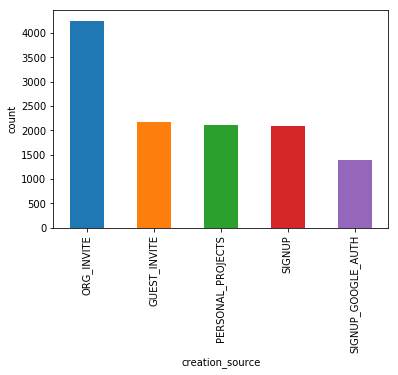

Text(0.5,0,'org_id')

Text(0,0.5,'contribution to ORG_INVITES')

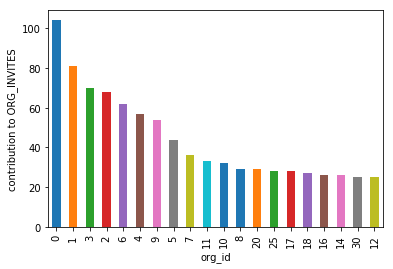

In [5]:
# Analyze 'creation_source'

df_users.creation_source.unique() # just like mentioned in the Asana question - there are 5 types of signing up 
df_users.creation_source.value_counts()

df_users.creation_source.value_counts().plot(kind='bar')
plt.xlabel('creation_source')
plt.ylabel('count')
plt.show()

# shows that majority of the sign-ups are through organization invites and less through sign-ups

# which organization contributes most to organization invites?
df_users.loc[df_users['creation_source'] == 'ORG_INVITE']['org_id'].value_counts().head(20).plot(kind='bar')
plt.xlabel('org_id')
plt.ylabel('contribution to ORG_INVITES')
# maximum organization contributor to Asana is the org_id : 0. 
# Notice that only about 1/3rds of the total signups for any org_id is through ORG_INVITES.  

array(['yahoo.com', 'gustr.com', 'jourrapide.com', ..., 'uyhoy.com',
       'eaouk.com', 'iuxiw.com'], dtype=object)

1184

gmail.com         3562
yahoo.com         2447
jourrapide.com    1259
cuvox.de          1202
gustr.com         1179
hotmail.com       1165
rerwl.com            2
dqwln.com            2
xvnbr.com            2
oqpze.com            2
Name: email_domain, dtype: int64

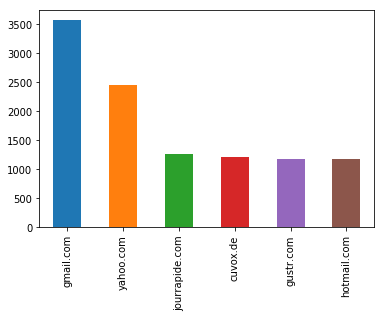

In [6]:
# Analyze email domains

df_users.email_domain.unique() # curious about domain names 
df_users.email_domain.nunique() # there are 1184 unique domain names 

# see the distribution of users' email domain names 
df_users.email_domain.value_counts().head(10) # after the top 6, it is all 2 or 1. 

df_users.email_domain.value_counts().head(6).plot(kind='bar')
# This 12000 user sampler has more gmail users than other domain users 

In [7]:
df_users[df_users.duplicated(['object_id'], keep=False)] # checking if this function works, yes 
# all object_ids are unique, so no unique object id 

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,email_domain


In [8]:
# The variable 'creation_time' raises some suspicion; there are 11996/12000 unique creation times. 
# Initially, I thought these users might be all the same; but it turns out that it is a coincidence that the users 
# have same account creation time. 

# Or maybe, these users belong to some group, and they had to create an account at the same time. Let's see their data.
df_users[df_users.duplicated(['creation_time'], keep=False)] 

# so 4 creation times are repeated ... but they are all different usernames. So, it is a coincidence that these 
# users have the same creation times .. (down to the second .. hmm ..)


,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,email_domain
1589,1590,2014-02-11 17:57:53,Walker Milton,MiltonLWalker@cuvox.de,ORG_INVITE,1.392228e+09,0,0,41,3510.0,cuvox.de
4743,4744,2012-09-01 07:22:09,Klein Jörg,JorgKlein@yahoo.com,ORG_INVITE,NaN,1,0,326,4744.0,yahoo.com
8069,8070,2014-02-11 17:57:53,Lebouef David,DavidELebouef@hotmail.com,GUEST_INVITE,1.401386e+09,0,0,119,4877.0,hotmail.com
9391,9392,2012-09-14 21:35:03,Toft Selma,SelmaMToft@gmail.com,SIGNUP,1.347659e+09,0,1,0,NaN,gmail.com
11223,11224,2012-09-01 07:22:09,Fuchs Klaus,KlausFuchs@yahoo.com,ORG_INVITE,1.346657e+09,1,0,36,3382.0,yahoo.com
11351,11352,2013-05-25 04:35:52,Theissen Luca,LucaTheissen@gmail.com,PERSONAL_PROJECTS,NaN,0,0,232,NaN,gmail.com
11821,11822,2012-09-14 21:35:03,Danielsen Natasja,NatasjaFDanielsen@gustr.com,ORG_INVITE,1.347831e+09,0,0,331,1114.0,gustr.com
11861,11862,2013-05-25 04:35:52,Friis Nansen,NansenMFriis@jourrapide.com,ORG_INVITE,1.369543e+09,1,0,331,11822.0,jourrapide.com


In [9]:
# Analyze last session creation time (lsct) and see where duplicates occur 

df_users_lsct = df_users[df_users.duplicated(['last_session_creation_time'], keep=False)] # the ones with NaNs are 
# trivial duplicates
df_users_lsct.last_session_creation_time.unique()

# see rows for which these are the lsct values
df_users_lsct.dropna(subset=['last_session_creation_time'])

# notice that lsct is same for people here with same creation_time (and not date) .. and this is because these users 
# have not used the app after they were created.

array([           nan, 1.40186802e+09, 1.40191690e+09])

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,email_domain
4217,4218,2014-01-20 07:46:58,Vanzant Nina,NinaWVanzant@jourrapide.com,GUEST_INVITE,1.401868e+09,0,0,364,3623.0,jourrapide.com
4784,4785,2012-09-10 21:21:37,Dam Marie,MarieBDam@gmail.com,SIGNUP_GOOGLE_AUTH,1.401917e+09,0,0,289,NaN,gmail.com
8601,8602,2012-10-25 07:46:58,May Julian,otauykft@ftdls.com,ORG_INVITE,1.401868e+09,0,0,387,8602.0,ftdls.com
8700,8701,2012-12-24 21:21:37,Thorsen Sander,SanderSThorsen@jourrapide.com,SIGNUP,1.401917e+09,0,0,10,NaN,jourrapide.com


In [10]:
# Note: it seems from the previous table that some users are able to invite themselves. 8602 id is being invited by 8602 id. 
df_users.loc[df_users['object_id'] == df_users['invited_by_user_id']]

# 222/ 12000 users have been invited by themselves .. what does that even mean - their creation sources are all different 



,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,email_domain
22,23,2012-08-17 08:30:27,Souza Alice,AliceAraujoSouza@gustr.com,ORG_INVITE,1.345279e+09,1,0,6,23.0,gustr.com
49,50,2012-06-03 11:02:08,Oliveira Gabrielly,GabriellyAlmeidaOliveira@gmail.com,GUEST_INVITE,1.350990e+09,0,0,61,50.0,gmail.com
120,121,2013-01-03 23:57:39,Toft Dennis,DennisMToft@cuvox.de,GUEST_INVITE,1.357257e+09,1,0,402,121.0,cuvox.de
177,178,2012-06-08 14:44:58,Brauer Daniela,DanielaBrauer@gmail.com,ORG_INVITE,1.339167e+09,0,0,415,178.0,gmail.com
192,193,2012-10-30 04:15:49,Rocha Erick,ErickPintoRocha@jourrapide.com,ORG_INVITE,1.351571e+09,1,0,122,193.0,jourrapide.com
228,229,2012-09-01 02:25:43,Oliveira Davi,DaviRochaOliveira@hotmail.com,ORG_INVITE,NaN,1,0,242,229.0,hotmail.com
421,422,2012-07-09 20:23:52,Davison Michael,MichaelDavison@gmail.com,GUEST_INVITE,NaN,1,1,143,422.0,gmail.com
444,445,2012-07-24 03:26:27,Klausen Alfred,AlfredLKlausen@gmail.com,GUEST_INVITE,1.401075e+09,0,0,289,445.0,gmail.com
463,464,2012-12-22 21:05:32,Ronning Connie,ConnieKRonning@cuvox.de,ORG_INVITE,1.356210e+09,0,1,262,464.0,cuvox.de
509,510,2012-06-07 10:27:14,Larsen Jonathan,JonathanJLarsen@yahoo.com,GUEST_INVITE,1.401878e+09,0,0,231,510.0,yahoo.com


array([1, 0])

array([0, 1])

Text(0.5,0,'opted in to mailing list')

Text(0,0.5,'count')

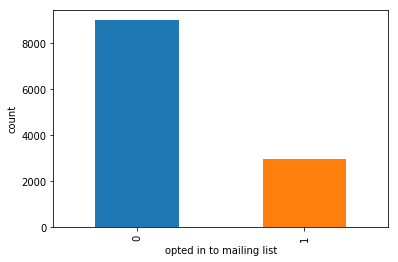

Text(0.5,0,'enabled for marketing drip')

Text(0,0.5,'count')

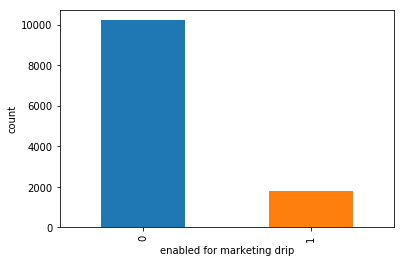

In [11]:
# check if mailing list and marketing drip have only binary values?
df_users['opted_in_to_mailing_list'].unique()
df_users['enabled_for_marketing_drip'].unique()

df_users['opted_in_to_mailing_list'].value_counts().plot(kind='bar')
plt.xlabel('opted in to mailing list')
plt.ylabel('count')
plt.show()

df_users['enabled_for_marketing_drip'].value_counts().plot(kind='bar')
plt.xlabel('enabled for marketing drip')
plt.ylabel('count')
plt.show()

# there are lot more people who have not signed up for mailing list/ marketing drip emails.

In [12]:
# What's left? - name / email / invited_by_user_id --> all have some duplicates 
# Analyze for email - lowest number of duplicates among these

# It seems that the users have to create a new account when they join a new organization, let's check that assumption
df_users[df_users.duplicated(['email'], keep=False)].sort_values(['org_id']).shape
df_users[df_users.duplicated(['email'], keep=False)].sort_values(['org_id'])

x = df_users[df_users.duplicated(['email'], keep=False)].sort_values(['email', 'creation_time'])
x
# if we are applying some ML algorithm using this dataset, I feel that there should only be 1 entry for 
# the people with same ids/names, else the rows might depend on each other for these examples below and error 
# might creep into the model. Ideally, the first try of these users must be the ones considered as the other users 
# in this dataframe also have used the app once.

# Or we could incorporate this variable using a new column called 'prev experience' to explain whether the user shifted 
# from another company or not.

ob_list_x = []
for row in x.itertuples(index=True, name='Pandas'):
    #print(row.user_id, row.new_time) # int, str classes
    ob_list_x.append(row.object_id)
    
len(ob_list_x)

(40, 11)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,email_domain
1603,1604,2014-02-03 04:48:08,Lane Alfie,AlfieLane@yahoo.com,ORG_INVITE,1.391662e+09,0,0,0,4128.0,yahoo.com
8424,8425,2012-10-11 18:53:41,Duerr Leonie,LeonieDuerr@gmail.com,ORG_INVITE,1.350414e+09,0,0,2,1359.0,gmail.com
3426,3427,2013-12-01 11:03:15,Walter Maximilian,MaximilianWalter@gmail.com,SIGNUP_GOOGLE_AUTH,1.385896e+09,0,0,2,NaN,gmail.com
3955,3956,2014-02-06 06:45:03,Nørgaard Lasse,LasseLNrgaard@gmail.com,ORG_INVITE,1.401000e+09,0,0,9,6442.0,gmail.com
6637,6638,2013-11-09 08:52:09,Schiffer Tom,TomSchiffer@gmail.com,ORG_INVITE,1.400835e+09,0,0,15,9118.0,gmail.com
4955,4956,2013-01-28 23:21:34,Mueller Klaus,KlausMueller@gustr.com,GUEST_INVITE,1.359415e+09,1,0,19,3225.0,gustr.com
7628,7629,2012-11-18 11:37:48,Brandt Thomas,ThomasBrandt@gmail.com,PERSONAL_PROJECTS,NaN,0,0,24,NaN,gmail.com
2751,2752,2013-10-12 22:10:03,Mueller Klaus,KlausMueller@gustr.com,ORG_INVITE,1.381616e+09,0,0,31,8202.0,gustr.com
7257,7258,2013-05-14 20:04:00,Nørgaard Lasse,LasseLNrgaard@gmail.com,ORG_INVITE,NaN,0,0,35,1904.0,gmail.com
6346,6347,2014-04-14 07:58:54,Winther Magnus,MagnusSWinther@jourrapide.com,SIGNUP,1.397549e+09,0,0,51,NaN,jourrapide.com


,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,email_domain
3822,3823,2012-11-22 05:51:29,Lane Alfie,AlfieLane@yahoo.com,ORG_INVITE,1.353650e+09,0,0,169,9498.0,yahoo.com
1603,1604,2014-02-03 04:48:08,Lane Alfie,AlfieLane@yahoo.com,ORG_INVITE,1.391662e+09,0,0,0,4128.0,yahoo.com
5280,5281,2012-09-29 11:54:08,Bach Amanda,AmandaABach@gmail.com,SIGNUP_GOOGLE_AUTH,1.401883e+09,0,0,146,NaN,gmail.com
9040,9041,2013-01-03 00:53:47,Bach Amanda,AmandaABach@gmail.com,ORG_INVITE,NaN,0,0,377,6208.0,gmail.com
375,376,2012-08-10 22:27:08,Tye Jacob,JacobTye@gmail.com,SIGNUP_GOOGLE_AUTH,1.344638e+09,1,0,104,NaN,gmail.com
5081,5082,2013-06-25 19:31:11,Tye Jacob,JacobTye@gmail.com,SIGNUP_GOOGLE_AUTH,1.372361e+09,0,0,298,NaN,gmail.com
3605,3606,2013-05-10 08:31:59,Sankt Janina,JaninaSankt@gmail.com,GUEST_INVITE,1.369816e+09,0,0,84,8356.0,gmail.com
1169,1170,2014-04-27 16:48:34,Sankt Janina,JaninaSankt@gmail.com,ORG_INVITE,1.398617e+09,1,1,285,623.0,gmail.com
11244,11245,2014-01-17 18:05:15,Neudorf Kerstin,KerstinNeudorf@gmail.com,SIGNUP,1.389982e+09,1,1,68,NaN,gmail.com
10153,10154,2014-05-06 10:57:37,Neudorf Kerstin,KerstinNeudorf@gmail.com,ORG_INVITE,1.400238e+09,0,0,359,4563.0,gmail.com


40

In [13]:
# Again, there is the 'name' field that seems to have many duplicates. Here, we might have to tread carefully, since 
# people with same names can be different, but them having the same email ID is unlikely since the domains
# will not allow that (username already taken error)

# Thus, people with same email IDs are for sure, the same people and I feel that only their first use of the app must
# be taken for predictions, like in the previous cell. We need to investigate the data for people with same names. 

# let us display the dataframe with names that have duplicates : and sorted according to the names 
y = df_users[df_users.duplicated(['name'], keep=False)].sort_values(['name', 'creation_time'])
y
# so these are the (1218/2) users that are using through other IDs as well. But, they are creating new accounts at Asana
# when they are switching companies. 

# While building an ML pipeline, i have to think if these users ((1218/2) /12000) must be included in the dataframe 
# since these are users who have used the Asana in their previous workplace as well, so they are not techincally 
# 'new' users. 

# Alt : I could introduce a column that indicates if the user has used Asana in a previous workplace. (1 - yes; 0 - no)
ob_list_y = []
for row in y.itertuples(index=True, name='Pandas'):
    #print(row.user_id, row.new_time) # int, str classes
    ob_list_y.append(row.object_id)
    
len(ob_list_y)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,email_domain
5768,5769,2013-07-24 00:55:06,Alexander Zoe,ZoeAlexander@gustr.com,SIGNUP,1.374714e+09,0,0,32,NaN,gustr.com
6696,6697,2013-11-11 04:10:17,Alexander Zoe,ZoeAlexander@yahoo.com,PERSONAL_PROJECTS,NaN,0,0,230,NaN,yahoo.com
5105,5106,2012-09-12 21:35:02,Almeida Aline,AlineSousaAlmeida@gmail.com,SIGNUP,1.347486e+09,0,0,79,NaN,gmail.com
6420,6421,2013-03-29 22:05:46,Almeida Aline,AlineBarbosaAlmeida@jourrapide.com,PERSONAL_PROJECTS,1.364768e+09,0,0,8,NaN,jourrapide.com
9710,9711,2013-06-03 06:28:46,Almeida André,AndreCorreiaAlmeida@hotmail.com,SIGNUP,1.370241e+09,0,0,44,NaN,hotmail.com
4116,4117,2014-03-14 11:12:37,Almeida André,AndreAzevedoAlmeida@jourrapide.com,ORG_INVITE,NaN,1,0,2,2710.0,jourrapide.com
2944,2945,2014-02-07 20:51:59,Almeida Arthur,ArthurPintoAlmeida@gmail.com,SIGNUP_GOOGLE_AUTH,1.401310e+09,0,0,261,NaN,gmail.com
3327,3328,2014-03-26 00:55:12,Almeida Arthur,ArthurRodriguesAlmeida@gmail.com,ORG_INVITE,1.395795e+09,0,0,0,6936.0,gmail.com
4745,4746,2014-04-15 10:17:37,Almeida Arthur,tnklzpbi@ovoiw.com,ORG_INVITE,NaN,0,0,267,1465.0,ovoiw.com
3587,3588,2013-02-10 02:29:14,Almeida Breno,shgljpwo@dxjxn.com,ORG_INVITE,1.360550e+09,0,0,58,4032.0,dxjxn.com


1206

In [14]:
# check if the users with the same email are included in the users with the same name? - all object ids are unique
set(ob_list_x).difference(ob_list_y)
x1 = x[x['object_id']==5948]
x2 = x[x['object_id']==6537]
# it's because of the name format, otherwise everyone other id in x is included in the y list. 
x1
x2

{5948, 6537}

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,email_domain
5947,5948,2013-10-02 08:32:32,Bertelsen Laerke,LaerkeMBertelsen@gmail.com,GUEST_INVITE,1.380789e+09,0,0,234,8598.0,gmail.com


,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,email_domain
6536,6537,2014-05-09 00:19:37,Bertelsen Lærke,LaerkeMBertelsen@gmail.com,PERSONAL_PROJECTS,NaN,1,1,127,NaN,gmail.com


In [15]:
# I will use later instances of the users (just not the first) and classify their previous experience as 1. 
# The same users with first instance will be with previous experience as 0. 

l1 = y.drop_duplicates(['name'], keep='first').object_id.tolist()
len(l1)
y_ind = y.index.tolist()
y_n_ind = [x+1 for x in y_ind]
len(y_n_ind)
set(l1).issubset(set(y_n_ind)) #-- True

ones = list(set(y_n_ind) - set(l1))
len(ones)
ones.append(6537)

561

1206

True

645

In [16]:
ob_list_yn = defaultdict(int)

for one in ones:
    ob_list_yn[one]=1

df_users['prev exp'] = df_users.apply(lambda row: ob_list_yn[row.object_id], axis=1)
df_users['prev exp'].value_counts() # sanity check
df_users

# also, note that some users have more than one prior experience, but it is difficult to quantify that. 
# example : it is difficult to prove that a user who has jumped between 5 orgs should have a '5' in their prev exp col


0    11354
1      646
Name: prev exp, dtype: int64

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,email_domain,prev exp
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,yahoo.com,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,gustr.com,0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,gustr.com,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,yahoo.com,1
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,yahoo.com,0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,yahoo.com,0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN,jourrapide.com,0
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN,yahoo.com,0
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN,hotmail.com,0
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,gustr.com,0


In [17]:
# Let us investigate the other table also, get a feel for it.
# Ideally, we would like to join these two tables and include a new column that comprises of what we want to predict.

In [18]:
df_eng = pd.read_csv("takehome_user_engagement-intern.csv") # no specific encoding required for these. 
df_eng.head(10)
# has a row for each day that a user logged into the product
df_eng.shape

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
5,2013-12-31 03:45:04,2,1
6,2014-01-08 03:45:04,2,1
7,2014-02-03 03:45:04,2,1
8,2014-02-08 03:45:04,2,1
9,2014-02-09 03:45:04,2,1


(207917, 3)

In [19]:
# let us have a column to indicate the number of times the user has logged into the product.

id_ = defaultdict(int) 
for row in df_eng.itertuples(index=True, name='Pandas'):
    id_[row.user_id] += 1
    
df_users['no. of visits'] = df_users.apply(lambda row: id_[row.object_id], axis=1)
df_users

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,email_domain,prev exp,no. of visits
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,yahoo.com,0,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,gustr.com,0,14
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,gustr.com,0,1
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,yahoo.com,1,1
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,yahoo.com,0,1
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,yahoo.com,0,1
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN,jourrapide.com,0,1
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN,yahoo.com,0,0
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN,hotmail.com,0,0
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,gustr.com,0,284


In [20]:
df_eng['visited'].unique()
df_eng['visited'].count()

# the 'visited' column has only 1s in it and is not useful after we get the total number of visits per user. 

array([1])

207917

In [21]:
# We need to identify which users are 'adopted' users based on the conditions. The next few cells deal with that. 

# here the specific time is common for any user ID; hence, no use of that, so make a column with just the dates 
df_eng['new_time'] = df_eng.apply(lambda row: row.time_stamp.split()[0], axis=1)

df_eng.head(5)

,time_stamp,user_id,visited,new_time
0,2014-04-22 03:53:30,1,1,2014-04-22
1,2013-11-15 03:45:04,2,1,2013-11-15
2,2013-11-29 03:45:04,2,1,2013-11-29
3,2013-12-09 03:45:04,2,1,2013-12-09
4,2013-12-25 03:45:04,2,1,2013-12-25


In [22]:
# check how many unique user ids are there
df_eng['user_id'].nunique()

# only 8823 / 12000 have even the chance of being in the 'adopted' user state
# the others, I presume are the ones who signed up, but never used the site.  

8823

In [23]:
# make this a dataset of shape (8823,2)
# for 8823 unique ids, the 2nd column must be a list of the dates; this will make it easy for comparison 
# or maybe a dictionary with the user ids as the key and the login dates as the values, that's way better than 
# dealing with tables here 

dic = defaultdict(list)
for row in df_eng.itertuples(index=True, name='Pandas'):
    #print(row.user_id, row.new_time) # int, str classes
    dic[row.user_id].append(row.new_time)

print(len(dic))
dic

8823


defaultdict(list,
            {1: ['2014-04-22'],
             2: ['2013-11-15',
              '2013-11-29',
              '2013-12-09',
              '2013-12-25',
              '2013-12-31',
              '2014-01-08',
              '2014-02-03',
              '2014-02-08',
              '2014-02-09',
              '2014-02-13',
              '2014-02-16',
              '2014-03-09',
              '2014-03-13',
              '2014-03-31'],
             3: ['2013-03-19'],
             4: ['2013-05-22'],
             5: ['2013-01-22'],
             6: ['2013-12-19'],
             7: ['2012-12-20'],
             10: ['2013-01-16',
              '2013-01-22',
              '2013-01-30',
              '2013-02-04',
              '2013-02-06',
              '2013-02-14',
              '2013-02-17',
              '2013-02-19',
              '2013-02-26',
              '2013-03-01',
              '2013-03-02',
              '2013-03-05',
              '2013-03-09',
              '2013-03-15'

In [24]:
# we just need to know which of these user_ids are adopted users 
# Suggestion for later: We could also find out how many times they become adopted users and use these as a new feature 

'''
A usage summary file ("takehome_user_engagement") that has a row for each day that a user logged into the product.
We define an "adopted user" as a user who has logged into the product on three separate days in at least 
one seven-day period.
'''

# So, if the length of list for a user_id < 3, then they will definitely not be an adopted user.
# remove such users from the dataframe -- working with dictionary only now

'\nA usage summary file ("takehome_user_engagement") that has a row for each day that a user logged into the product.\nWe define an "adopted user" as a user who has logged into the product on three separate days in at least \none seven-day period.\n'

In [25]:
# dicts are mutable objects in python and we want to delete certain keys from a dictionary, hence we need to deepcopy
# Idea: represent each login as a diff in the number of days with the day0 - sign up day. 

new_dic = copy.deepcopy(dic)
for key, value in dic.items():
    if len(value) < 3:
        _ = new_dic.pop(key)
    else: # convert them to datetime objects
        new_dic[key] = [] 
        d0 = date(int(value[0].split('-')[0]), int(value[0].split('-')[1]), int(value[0].split('-')[2]))
        for value_ in value:
            year = int(value_.split('-')[0])
            month = int(value_.split('-')[1])
            day = int(value_.split('-')[2])
            d = date(year,month,day)
            new_dic[key].append((d-d0).days)
            
        
print(len(new_dic))
print(len(dic))
print(new_dic)

2248
8823


defaultdict(<class 'list'>, {2: [0, 14, 24, 40, 46, 54, 80, 85, 86, 90, 93, 114, 118, 136], 10: [0, 6, 14, 19, 21, 29, 32, 34, 41, 44, 45, 48, 52, 58, 60, 63, 65, 69, 81, 85, 87, 88, 91, 93, 98, 100, 101, 104, 105, 106, 107, 110, 111, 112, 114, 116, 119, 121, 122, 127, 128, 131, 133, 138, 139, 142, 144, 145, 146, 148, 150, 151, 152, 153, 157, 161, 163, 165, 168, 169, 170, 171, 173, 174, 178, 181, 182, 183, 185, 186, 187, 189, 190, 193, 194, 195, 198, 199, 200, 202, 204, 206, 209, 213, 215, 216, 219, 220, 222, 223, 225, 226, 227, 228, 229, 231, 232, 235, 236, 237, 240, 241, 242, 244, 248, 249, 251, 252, 257, 260, 262, 263, 266, 269, 270, 271, 274, 278, 280, 281, 282, 285, 286, 288, 292, 295, 298, 302, 304, 309, 312, 317, 320, 321, 324, 328, 329, 330, 335, 336, 337, 338, 340, 341, 342, 343, 345, 346, 347, 348, 350, 351, 352, 354, 357, 358, 359, 360, 362, 363, 364, 365, 366, 368, 369, 371, 372, 373, 374, 375, 376, 377, 378, 379, 381, 382, 385, 388, 389, 390, 392, 393, 394, 395, 396, 397, 

In [26]:
# we need to see which users log in 3 times in at least one 7 day period. 
# example of limiting case : [sunday, thursday, sunday] --> if expressed as difference between dates: [4, 3]
# first, generate difference list and then do a two-sum <= 7 operation on this list 

nnew_dic = copy.deepcopy(new_dic)
result = {} 

def check_sum(ls):
    for i in range(len(ls)-1):
        if ls[i]+ls[i+1]<=7:
            return True
    return False

for key, value in new_dic.items():
    nnew_dic[key] = [x - value[i - 1] for i, x in enumerate(value)][1:]
    # now check for two-sum of this list 
    result[key] = check_sum(nnew_dic[key])
    
print(nnew_dic)

defaultdict(<class 'list'>, {2: [14, 10, 16, 6, 8, 26, 5, 1, 4, 3, 21, 4, 18], 10: [6, 8, 5, 2, 8, 3, 2, 7, 3, 1, 3, 4, 6, 2, 3, 2, 4, 12, 4, 2, 1, 3, 2, 5, 2, 1, 3, 1, 1, 1, 3, 1, 1, 2, 2, 3, 2, 1, 5, 1, 3, 2, 5, 1, 3, 2, 1, 1, 2, 2, 1, 1, 1, 4, 4, 2, 2, 3, 1, 1, 1, 2, 1, 4, 3, 1, 1, 2, 1, 1, 2, 1, 3, 1, 1, 3, 1, 1, 2, 2, 2, 3, 4, 2, 1, 3, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 3, 1, 1, 3, 1, 1, 2, 4, 1, 2, 1, 5, 3, 2, 1, 3, 3, 1, 1, 3, 4, 2, 1, 1, 3, 1, 2, 4, 3, 3, 4, 2, 5, 3, 5, 3, 1, 3, 4, 1, 1, 5, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 20: [1, 1, 55, 4, 17, 1], 33: [6, 5, 1, 7, 4, 6, 3, 5, 4, 4, 5, 1

In [27]:
print(len(result))
print(result)
results_orig = copy.deepcopy(result)

2248


{2: True, 10: True, 20: True, 33: True, 42: True, 43: True, 50: True, 53: True, 59: False, 60: True, 63: True, 69: True, 74: True, 77: False, 80: True, 81: True, 82: True, 87: True, 95: False, 126: False, 133: True, 135: True, 136: False, 141: True, 142: False, 146: True, 153: True, 160: True, 165: True, 168: True, 171: False, 172: True, 174: True, 185: True, 188: True, 197: True, 200: True, 202: True, 203: True, 209: True, 214: True, 221: False, 230: True, 241: False, 245: True, 247: True, 251: False, 263: True, 265: True, 275: True, 277: False, 280: True, 283: True, 297: True, 298: True, 305: True, 310: True, 311: True, 321: True, 322: True, 330: False, 337: False, 341: True, 345: True, 347: True, 351: True, 362: True, 363: True, 367: False, 370: True, 375: False, 382: False, 383: True, 390: False, 397: True, 398: False, 401: True, 417: False, 418: True, 430: True, 445: True, 450: True, 455: False, 460: True, 462: True, 469: True, 471: True, 472: True, 478: True, 479: True, 481: Fals

In [28]:
# directly put info from 'result' into df_users
# user_id is same as object_id

for row in df_users.itertuples(index=True, name='Pandas'):
    if row.object_id not in result:
        result[row.object_id] = False

df_users['result'] = df_users.apply(lambda row: result[row.object_id], axis=1)
df_users.head(10)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,email_domain,prev exp,no. of visits,result
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,yahoo.com,0,1,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,gustr.com,0,14,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,gustr.com,0,1,False
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,yahoo.com,1,1,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,yahoo.com,0,1,False
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,yahoo.com,0,1,False
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN,jourrapide.com,0,1,False
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN,yahoo.com,0,0,False
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN,hotmail.com,0,0,False
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,gustr.com,0,284,True


In [29]:
list(result.values()).count(True) + list(result.values()).count(False)
len(df_users)
# sanity checks

12000

12000

In [30]:
# now onwards, we will be dealing with this dataframe only. 
# before plotting graphs, we need to gain intuition for each factor and how they affect the result. 

# we need to do pairwise comparisons ... with the new columns created. 

In [31]:
df_users.count()

object_id                     12000
creation_time                 12000
name                          12000
email                         12000
creation_source               12000
last_session_creation_time     8823
opted_in_to_mailing_list      12000
enabled_for_marketing_drip    12000
org_id                        12000
invited_by_user_id             6417
email_domain                  12000
prev exp                      12000
no. of visits                 12000
result                        12000
dtype: int64

In [32]:
df_users['invited_by_user_id'].fillna(0, inplace=True) # replacing NaNs with 0 - for users who join on their own volition 
# let's call them 'uninvited' users. 

result[0] = 'uninvited' # uninvited 

df_users['inv_user_status'] = df_users.apply(lambda row: result[int(row.invited_by_user_id)], axis=1)
# here, I want to note if the user who is inviting the new user is an adopted user/ not. 

df_users

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,email_domain,prev exp,no. of visits,result,inv_user_status
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,yahoo.com,0,1,False,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,gustr.com,0,14,True,False
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,gustr.com,0,1,False,True
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,yahoo.com,1,1,False,True
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,yahoo.com,0,1,False,True
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,yahoo.com,0,1,False,False
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,0.0,jourrapide.com,0,1,False,uninvited
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,0.0,yahoo.com,0,0,False,uninvited
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,0.0,hotmail.com,0,0,False,uninvited
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,gustr.com,0,284,True,True


In [33]:
# split creation_time into year, month and day; easier to analyze 
df_users['cr_year'] = df_users.apply(lambda row: row.creation_time.split('-')[0], axis=1)
df_users['cr_mon'] = df_users.apply(lambda row: row.creation_time.split('-')[1], axis=1)
df_users['cr_day'] = df_users.apply(lambda row: row.creation_time.split('-')[2].split()[0], axis=1)

df_users['invited_by_user_id'] = df_users['invited_by_user_id'].apply(int) # this was in float all along .. 
df_users


,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,email_domain,prev exp,no. of visits,result,inv_user_status,cr_year,cr_mon,cr_day
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803,yahoo.com,0,1,False,False,2014,04,22
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316,gustr.com,0,14,True,False,2013,11,15
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525,gustr.com,0,1,False,True,2013,03,19
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151,yahoo.com,1,1,False,True,2013,05,21
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240,yahoo.com,0,1,False,True,2013,01,17
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241,yahoo.com,0,1,False,False,2013,12,17
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,0,jourrapide.com,0,1,False,uninvited,2012,12,16
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,0,yahoo.com,0,0,False,uninvited,2013,07,31
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,0,hotmail.com,0,0,False,uninvited,2013,11,05
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143,gustr.com,0,284,True,True,2013,01,16


2013    5676
2014    3527
2012    2797
Name: cr_year, dtype: int64

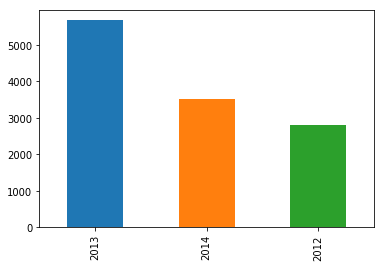

In [34]:
# anyway, let's look at some graphs. - these are for general user stats (we will do stats based on adopted/ not after this)
# check out the histogram of each variable without reference to the result column 
df_users['cr_year'].value_counts()
df_users['cr_year'].value_counts().plot(kind='bar')

# 2013 seems to be the year with significant account creations

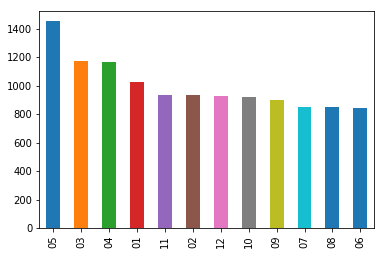

In [35]:
df_users['cr_mon'].value_counts().plot(kind='bar')
# May, April and March seem to increase account creation 

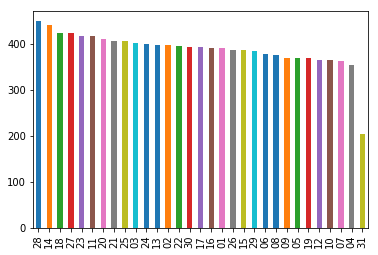

In [36]:
df_users['cr_day'].value_counts().plot(kind='bar')
# not much we can say about the rest of the days, but if account created on 31st, there is approx half, this is because
# only 6 months have 31st - so misleading , don't read much into the days ... 

# 28th is important 

# we would like to know when in a month, are the most number of sign ups. Using the day number is not a great way to 
# get a feel of this statistic. We would like to convert these to 1 of 4 weeks (indicating part of the month)
# or, day name - Monday, Tuesday .. and so on. 

uninvited    5583
False        5283
True         1134
Name: inv_user_status, dtype: int64

False    10344
True      1656
Name: result, dtype: int64

0        5583
10741      13
2527       12
11770      11
2308       11
1525       11
4302       10
10481      10
2354       10
4803       10
1175       10
6370       10
10628      10
4612       10
7012       10
Name: invited_by_user_id, dtype: int64

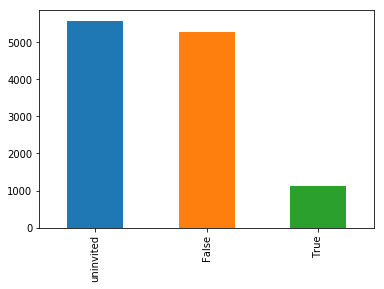

In [37]:
df_users['inv_user_status'].value_counts()
df_users['result'].value_counts()

# 'seems' like most of the users who adopted most likely invite others for this app
# looks like : 1134/ 1656 recommend using this app - it means app is good 

# test the above? - sometimes the same person can invite more than one person
df_users['invited_by_user_id'].value_counts().head(15)
# yes, some users invite a lot more than other users

df_users['inv_user_status'].value_counts().plot(kind='bar')

In [38]:
df_users['invited_by_user_id'].nunique()
# so there are some adopted users who recommend and some non-adopted users who also recommend 
# 2564 people/ 12000 invite others to try this app (0 is not-invited case)
# out of this, how many are adopted?

[result[i] for i in df_users['invited_by_user_id'].value_counts().as_matrix()].count(True)
# 537/2564 people who invite are adopted users [20.943837753 %]
# 537/1656 adopted users are likely to invite others [32.427536231 %]

2565

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


537

In [39]:
# last session creation time is the unix converter ... verified with https://www.epochconverter.com/ of the last login time.
# decision tree will be able to work with this column, maybe normalize this. 


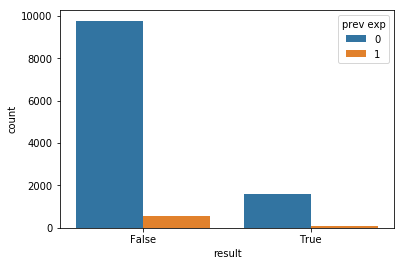

In [40]:
sns.countplot(x="result", hue="prev exp", data=df_users)

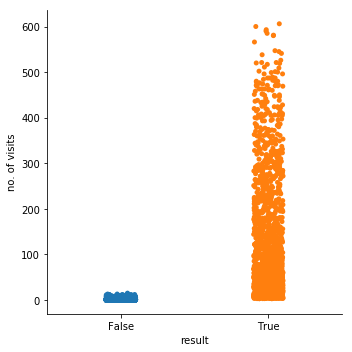

In [41]:
sns.catplot(x="result", y="no. of visits", data=df_users)
# we see that as the number of visits increase, adoption is more probable. 
# highly correlated feature 

ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

ORG_INVITE            574
GUEST_INVITE          369
SIGNUP                302
SIGNUP_GOOGLE_AUTH    239
PERSONAL_PROJECTS     172
Name: creation_source, dtype: int64

0.13493182886694877

0.17059639389736478

0.14470531863919503

0.17256317689530687

0.08147797252486973

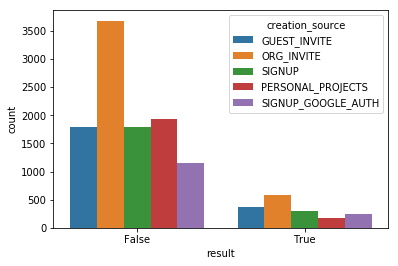

In [42]:
sns.countplot(x="result", hue="creation_source", data=df_users)
df_users['creation_source'].value_counts()
df_users[df_users['result']==True]['creation_source'].value_counts()

574/4254; 369/2163; 302/2087; 239/1385; 172/2111

0    9006
1    2994
Name: opted_in_to_mailing_list, dtype: int64

0    1227
1     429
Name: opted_in_to_mailing_list, dtype: int64

0.1432865731462926

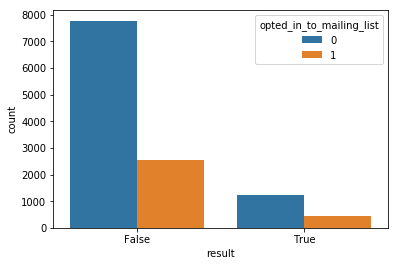

In [43]:
sns.countplot(x="result", hue="opted_in_to_mailing_list", data=df_users)
# those who opten in for the mailing list have this much chance of turning into a adopted user
# speaks about effectiveness of mailing list 

df_users['opted_in_to_mailing_list'].value_counts()
df_users[df_users['result']==True]['opted_in_to_mailing_list'].value_counts()

429/2994

0    10208
1     1792
Name: enabled_for_marketing_drip, dtype: int64

0    1399
1     257
Name: enabled_for_marketing_drip, dtype: int64

0.14341517857142858

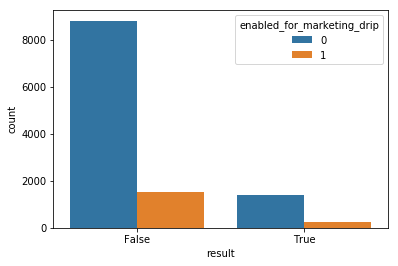

In [44]:
sns.countplot(x="result", hue="enabled_for_marketing_drip", data=df_users)
# speak about effectiveness of marketing drip .. google this term and check exact meaning.
# those who opten in for the marketing drip have this much chance of turning into a adopted user

df_users['enabled_for_marketing_drip'].value_counts()
df_users[df_users['result']==True]['enabled_for_marketing_drip'].value_counts()

257/1792

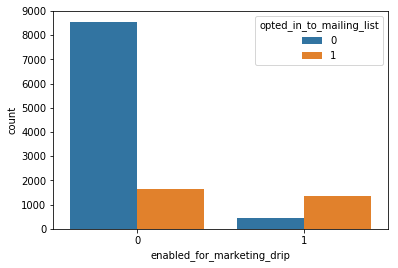

In [45]:
#sns.countplot(x="opted_in_to_mailing_list", hue="enabled_for_marketing_drip", data=df_users)
sns.countplot(x="enabled_for_marketing_drip", hue="opted_in_to_mailing_list", data=df_users)


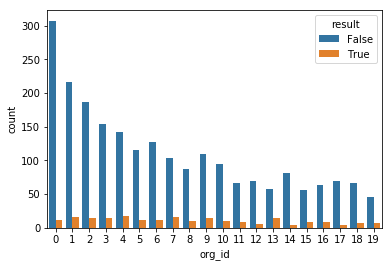

In [46]:
sns.countplot(x="org_id", hue="result", data=df_users[df_users['org_id'] < 20 ])

2013    5676
2014    3527
2012    2797
Name: cr_year, dtype: int64

2013    875
2012    468
2014    313
Name: cr_year, dtype: int64

0.15415785764622975

0.16732213085448694

0.08874397504961724

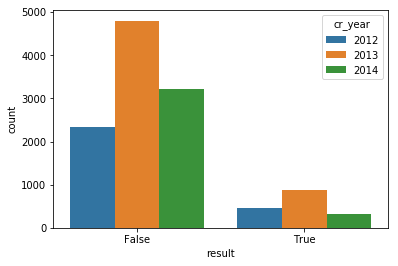

In [47]:
sns.countplot(x="result", hue="cr_year", data=df_users)
df_users['cr_year'].value_counts()
df_users[df_users['result']==True]['cr_year'].value_counts()

875/5676; 468/2797; 313/3527

# the year 2013 has 15% retention, whereas the year 2012 has 16% retention and least retention of just 8% for 2014.  

05    1455
03    1177
04    1169
01    1029
11     936
02     934
12     930
10     924
09     901
07     852
08     852
06     841
Name: cr_mon, dtype: int64

03    164
10    162
06    153
11    151
01    150
08    145
09    142
02    137
12    136
07    123
04    115
05     78
Name: cr_mon, dtype: int64

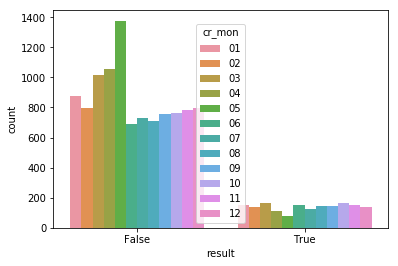

In [48]:
sns.countplot(x="result", hue="cr_mon", data=df_users)
df_users['cr_mon'].value_counts()
df_users[df_users['result']==True]['cr_mon'].value_counts()

# Although more users have signed up during March, April and May; March has most adoption rate.

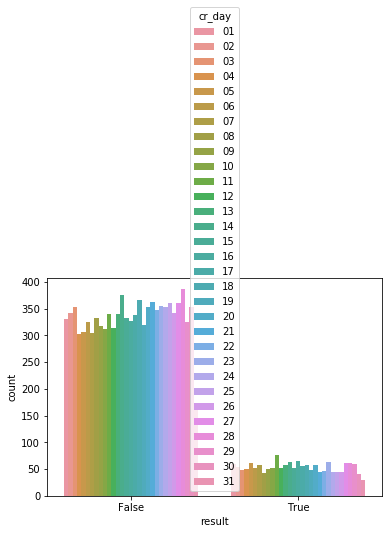

In [49]:
sns.countplot(x="result", hue="cr_day", data=df_users)

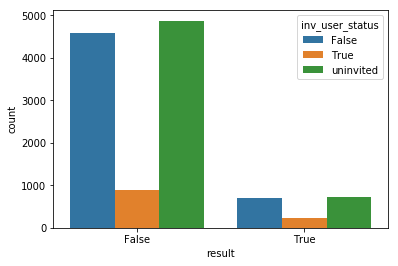

In [50]:
sns.countplot(x="result", hue="inv_user_status", data=df_users)

In [51]:
# sns.countplot(x="result", hue="email_domain", data=df_users[])
# use top 5 email domains only
# we need a new df for just the relevant information 

In [52]:
day_week = {('0'+str(i) if i<10 else str(i)) : ('week'+str(math.ceil((i/7))) if i<10 else 'week'+str(math.ceil((i/7)))) for i in range(1,32)}
day_week

df_users['week_no'] = df_users.apply(lambda row: day_week[row.cr_day], axis=1)
df_users['day'] = df_users.apply(lambda row: calendar.day_name[datetime.date(int(row['cr_year']), int(row['cr_mon']), int(row['cr_day'])).weekday()], axis=1)

df_users

{'01': 'week1',
 '02': 'week1',
 '03': 'week1',
 '04': 'week1',
 '05': 'week1',
 '06': 'week1',
 '07': 'week1',
 '08': 'week2',
 '09': 'week2',
 '10': 'week2',
 '11': 'week2',
 '12': 'week2',
 '13': 'week2',
 '14': 'week2',
 '15': 'week3',
 '16': 'week3',
 '17': 'week3',
 '18': 'week3',
 '19': 'week3',
 '20': 'week3',
 '21': 'week3',
 '22': 'week4',
 '23': 'week4',
 '24': 'week4',
 '25': 'week4',
 '26': 'week4',
 '27': 'week4',
 '28': 'week4',
 '29': 'week5',
 '30': 'week5',
 '31': 'week5'}

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,email_domain,prev exp,no. of visits,result,inv_user_status,cr_year,cr_mon,cr_day,week_no,day
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803,yahoo.com,0,1,False,False,2014,04,22,week4,Tuesday
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316,gustr.com,0,14,True,False,2013,11,15,week3,Friday
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525,gustr.com,0,1,False,True,2013,03,19,week3,Tuesday
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151,yahoo.com,1,1,False,True,2013,05,21,week3,Tuesday
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240,yahoo.com,0,1,False,True,2013,01,17,week3,Thursday
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241,yahoo.com,0,1,False,False,2013,12,17,week3,Tuesday
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,0,jourrapide.com,0,1,False,uninvited,2012,12,16,week3,Sunday
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,0,yahoo.com,0,0,False,uninvited,2013,07,31,week5,Wednesday
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,0,hotmail.com,0,0,False,uninvited,2013,11,05,week1,Tuesday
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143,gustr.com,0,284,True,True,2013,01,16,week3,Wednesday


In [53]:
ml_data = df_users.drop(['object_id', 'name', 'creation_time', 'email', 'invited_by_user_id', 'cr_day'], axis=1)
ml_data['last_session_creation_time'].count() # 8823/12000 has NaNs here, safe to remove from dataset, I feel 
# there is no imputation possible here as it is unique to a user 
ml_data = df_users.drop(['object_id', 'name', 'creation_time', 'email', 'invited_by_user_id', 'last_session_creation_time', 'cr_day'], axis=1)
ml_data

# let us create a new .csv file with this new data. 
ml_data.to_csv('ml_data.csv')
ml_data.count() # no nans


8823

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,email_domain,prev exp,no. of visits,result,inv_user_status,cr_year,cr_mon,week_no,day
0,GUEST_INVITE,1,0,11,yahoo.com,0,1,False,False,2014,04,week4,Tuesday
1,ORG_INVITE,0,0,1,gustr.com,0,14,True,False,2013,11,week3,Friday
2,ORG_INVITE,0,0,94,gustr.com,0,1,False,True,2013,03,week3,Tuesday
3,GUEST_INVITE,0,0,1,yahoo.com,1,1,False,True,2013,05,week3,Tuesday
4,GUEST_INVITE,0,0,193,yahoo.com,0,1,False,True,2013,01,week3,Thursday
5,GUEST_INVITE,0,0,197,yahoo.com,0,1,False,False,2013,12,week3,Tuesday
6,SIGNUP,0,1,37,jourrapide.com,0,1,False,uninvited,2012,12,week3,Sunday
7,PERSONAL_PROJECTS,1,1,74,yahoo.com,0,0,False,uninvited,2013,07,week5,Wednesday
8,PERSONAL_PROJECTS,0,0,302,hotmail.com,0,0,False,uninvited,2013,11,week1,Tuesday
9,ORG_INVITE,1,1,318,gustr.com,0,284,True,True,2013,01,week3,Wednesday


creation_source               12000
opted_in_to_mailing_list      12000
enabled_for_marketing_drip    12000
org_id                        12000
email_domain                  12000
prev exp                      12000
no. of visits                 12000
result                        12000
inv_user_status               12000
cr_year                       12000
cr_mon                        12000
week_no                       12000
day                           12000
dtype: int64

In [54]:
# This is an entirely categorical dataset, best would be to use decision trees/ knn (with effective distance metric)/
# logistic regression (if org_id is brought down to 7 levels).
# we will try random forests, which will definitely perform better than a single decision tree dure to ensemble learning 
# algorithm.

# Current decision tree implementation in scikit learn (with label/ one-hot encoding) converts categorical to numeric
# attributes; but they will be treated like a numerical attribute, with ordering between the numbers. 
# The decision trees implemented in scikit-learn uses only numerical features and these features are interpreted always 
# as continuous numeric variables.

# Our factors (with the exception of 'no. of vists' will need to be represented in an ordinal manner). 

In [55]:
# Intuitively, we can test the effectiveness of using 'prev exp' as a factor, using the principle of information gain. 

df_users['prev exp'].value_counts()

df_users[df_users['prev exp']==0]['result'].value_counts()

df_users[df_users['prev exp']==1]['result'].value_counts()

sc.stats.entropy([(11354/12000),(646/12000)]) # before
(sc.stats.entropy([(9775/(1579+9775)),(1579/(1579+9775))])*(11354/12000)) # 0 side
(sc.stats.entropy([(569/(569+77)),(77/(569+77))])*(646/12000)) # 1 side

ig = (sc.stats.entropy([(9775/(1579+9775)),(1579/(1579+9775))])*(11354/12000)) + (sc.stats.entropy([(569/(569+77)),(77/(569+77))])*(646/12000)) - sc.stats.entropy([(11354/12000),(646/12000)])
ig # is not much, hence this might not be a great factor. 


0    11354
1      646
Name: prev exp, dtype: int64

False    9775
True     1579
Name: result, dtype: int64

False    569
True      77
Name: result, dtype: int64

0.2096511882433369

0.38156209036873107

0.019666291245245406

0.19157719337063955

In [56]:
# we will be using the h20 python module for testing decision tree classifiers 
h2o.init()
ml_df = h2o.import_file(path='ml_data.csv')

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_152-release"; OpenJDK Runtime Environment (build 1.8.0_152-release-1056-b12); OpenJDK 64-Bit Server VM (build 25.152-b12, mixed mode)
  Starting server from /anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/l2/66b3xdxd7210rd4pk86r5s1r0000gn/T/tmpnpscpdev
  JVM stdout: /var/folders/l2/66b3xdxd7210rd4pk86r5s1r0000gn/T/tmpnpscpdev/h2o_anirudha_started_from_python.out
  JVM stderr: /var/folders/l2/66b3xdxd7210rd4pk86r5s1r0000gn/T/tmpnpscpdev/h2o_anirudha_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,America/Los_Angeles
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.0.2
H2O cluster version age:,27 days
H2O cluster name:,H2O_from_python_anirudha_vaxzbm
H2O cluster total nodes:,1
H2O cluster free memory:,3.556 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,12
H2O cluster status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [57]:
ml_df.head(20)

C1,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,email_domain,prev exp,no. of visits,result,inv_user_status,cr_year,cr_mon,week_no,day
0,GUEST_INVITE,1,0,11,yahoo.com,0,1,False,False,2014,4,week4,Tuesday
1,ORG_INVITE,0,0,1,gustr.com,0,14,True,False,2013,11,week3,Friday
2,ORG_INVITE,0,0,94,gustr.com,0,1,False,True,2013,3,week3,Tuesday
3,GUEST_INVITE,0,0,1,yahoo.com,1,1,False,True,2013,5,week3,Tuesday
4,GUEST_INVITE,0,0,193,yahoo.com,0,1,False,True,2013,1,week3,Thursday
5,GUEST_INVITE,0,0,197,yahoo.com,0,1,False,False,2013,12,week3,Tuesday
6,SIGNUP,0,1,37,jourrapide.com,0,1,False,uninvited,2012,12,week3,Sunday
7,PERSONAL_PROJECTS,1,1,74,yahoo.com,0,0,False,uninvited,2013,7,week5,Wednesday
8,PERSONAL_PROJECTS,0,0,302,hotmail.com,0,0,False,uninvited,2013,11,week1,Tuesday
9,ORG_INVITE,1,1,318,gustr.com,0,284,True,True,2013,1,week3,Wednesday


In [58]:
ml_df_ = ml_df.drop(0) # droppping index from the dataframe .csv file 
ml_df_

ml_df_['creation_source'] = ml_df_['creation_source'].asfactor()
ml_df_['opted_in_to_mailing_list'] = ml_df_['opted_in_to_mailing_list'].asfactor()
ml_df_['enabled_for_marketing_drip'] = ml_df_['enabled_for_marketing_drip'].asfactor()
ml_df_['org_id'] = ml_df_['org_id'].asfactor()
ml_df_['prev exp'] = ml_df_['prev exp'].asfactor()
ml_df_['inv_user_status'] = ml_df_['inv_user_status'].asfactor()
ml_df_['cr_year'] = ml_df_['cr_year'].asfactor()
ml_df_['cr_mon'] = ml_df_['cr_mon'].asfactor()
ml_df_['week_no'] = ml_df_['week_no'].asfactor()
ml_df_['email_domain'] = ml_df_['email_domain'].asfactor()
ml_df_['day'] = ml_df_['day'].asfactor()

creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,email_domain,prev exp,no. of visits,result,inv_user_status,cr_year,cr_mon,week_no,day
GUEST_INVITE,1,0,11,yahoo.com,0,1,False,False,2014,4,week4,Tuesday
ORG_INVITE,0,0,1,gustr.com,0,14,True,False,2013,11,week3,Friday
ORG_INVITE,0,0,94,gustr.com,0,1,False,True,2013,3,week3,Tuesday
GUEST_INVITE,0,0,1,yahoo.com,1,1,False,True,2013,5,week3,Tuesday
GUEST_INVITE,0,0,193,yahoo.com,0,1,False,True,2013,1,week3,Thursday
GUEST_INVITE,0,0,197,yahoo.com,0,1,False,False,2013,12,week3,Tuesday
SIGNUP,0,1,37,jourrapide.com,0,1,False,uninvited,2012,12,week3,Sunday
PERSONAL_PROJECTS,1,1,74,yahoo.com,0,0,False,uninvited,2013,7,week5,Wednesday
PERSONAL_PROJECTS,0,0,302,hotmail.com,0,0,False,uninvited,2013,11,week1,Tuesday
ORG_INVITE,1,1,318,gustr.com,0,284,True,True,2013,1,week3,Wednesday


In [59]:
ml_df_.isfactor()
ml_df_.nlevels()
# sanity checks

[True, True, True, True, True, True, False, True, True, True, True, True, True]

[5, 2, 2, 417, 1184, 2, 0, 2, 3, 3, 12, 5, 7]

In [60]:
### using grid search
# you need stratified sampling 
# train, valid = ml_df_.split_frame(ratios=[0.80])
stratsplit = ml_df_["result"].stratified_split(test_frac=0.45, seed=12349453)
train = ml_df_[stratsplit=="train"]
valid_ = ml_df_[stratsplit=="test"]

stratsplit_valid = valid_["result"].stratified_split(test_frac=0.45, seed=54654)
valid = valid_[stratsplit_valid=="train"]
test = valid_[stratsplit_valid=="test"]

# sanity checks
ml_df_["result"].table()["Count"] / ml_df_["result"].table()["Count"].sum()
train["result"].table()["Count"] / train["result"].table()["Count"].sum()
valid["result"].table()["Count"] / valid["result"].table()["Count"].sum()
test["result"].table()["Count"] / test["result"].table()["Count"].sum()


Count
0.862
0.138


Count
0.86197
0.13803


Count
0.861953
0.138047


Count
0.86214
0.13786


In [75]:
# here is the case when the factors as given in the .csv file are used as such 
training_cols = ['email_domain', 'day', 'creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id', 'cr_year', 'cr_mon', 'week_no'] 
response_col = 'result'


In [78]:
from h2o.estimators import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch

ntrees_opt = [5, 10, 15]
max_depth_opt = [2, 10, 15]

hyper_params = {'ntrees': ntrees_opt, 'max_depth': max_depth_opt}

gs = H2OGridSearch(H2ORandomForestEstimator, hyper_params = hyper_params)

gs.train(x=training_cols, y=response_col, training_frame=train, validation_frame=valid)
print(gs)

# print out the auc for all of the models
auc_table = gs.sort_by('auc(valid=True)',increasing=False)
print(auc_table)

best_model = h2o.get_model(auc_table['Model Id'][0])
best_model.auc() # on the training data

performance = best_model.model_performance(test_data=test)

print(performance)
best_model.varimp(use_pandas=True)
performance.auc()


drf Grid Build progress: |████████████████████████████████████████████████| 100%
    max_depth ntrees  \
0           2     15   
1           2     10   
2           2      5   
3          10     15   
4          10     10   
5          10      5   
6          15     15   
7          15     10   
8          15      5   

                                                        model_ids  \
0  Grid_DRF_py_9_sid_800e_model_python_1545245053523_2017_model_7   
1  Grid_DRF_py_9_sid_800e_model_python_1545245053523_2017_model_4   
2  Grid_DRF_py_9_sid_800e_model_python_1545245053523_2017_model_1   
3  Grid_DRF_py_9_sid_800e_model_python_1545245053523_2017_model_8   
4  Grid_DRF_py_9_sid_800e_model_python_1545245053523_2017_model_5   
5  Grid_DRF_py_9_sid_800e_model_python_1545245053523_2017_model_2   
6  Grid_DRF_py_9_sid_800e_model_python_1545245053523_2017_model_9   
7  Grid_DRF_py_9_sid_800e_model_python_1545245053523_2017_model_6   
8  Grid_DRF_py_9_sid_800e_model_python_1545245053523_2017

Model Id,"Hyperparameters: [ntrees, max_depth]",auc(valid=True)
Grid_DRF_py_9_sid_800e_model_python_1545245053523_2017_model_8,"[15, 10]",0.5492021
Grid_DRF_py_9_sid_800e_model_python_1545245053523_2017_model_4,"[10, 2]",0.5276677
Grid_DRF_py_9_sid_800e_model_python_1545245053523_2017_model_7,"[15, 2]",0.5261171
Grid_DRF_py_9_sid_800e_model_python_1545245053523_2017_model_2,"[5, 10]",0.5248142
Grid_DRF_py_9_sid_800e_model_python_1545245053523_2017_model_5,"[10, 10]",0.5241225
Grid_DRF_py_9_sid_800e_model_python_1545245053523_2017_model_1,"[5, 2]",0.5227487
Grid_DRF_py_9_sid_800e_model_python_1545245053523_2017_model_3,"[5, 15]",0.5146932
Grid_DRF_py_9_sid_800e_model_python_1545245053523_2017_model_6,"[10, 15]",0.5119746
Grid_DRF_py_9_sid_800e_model_python_1545245053523_2017_model_9,"[15, 15]",0.4990558


0.5588220670174895


ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.12844616703071135
RMSE: 0.3583938713632131
LogLoss: 0.7347767749830237
Mean Per-Class Error: 0.44959925907455567
AUC: 0.5672083496598155
pr_auc: 0.17292109392155278
Gini: 0.13441669931963096
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.00043687512477239563: 


,False,True,Error,Rate
False,330.0,1765.0,0.8425,(1765.0/2095.0)
True,19.0,316.0,0.0567,(19.0/335.0)
Total,349.0,2081.0,0.7342,(1784.0/2430.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.0004369,0.2615894,398.0
max f2,0.0004369,0.4618533,398.0
max f0point5,0.1667994,0.2005782,209.0
max accuracy,0.7677421,0.8617284,0.0
max precision,0.5152645,0.3225806,22.0
max recall,0.0,1.0,399.0
max specificity,0.7677421,0.9995227,0.0
max absolute_mcc,0.0004369,0.0990906,398.0
max min_per_class_accuracy,0.0694970,0.5293556,308.0
max mean_per_class_accuracy,0.0004369,0.5504007,398.0


Gains/Lift Table: Avg response rate: 13.79 %, avg score: 10.79 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0102881,0.5339883,2.0310448,2.0310448,0.28,0.5934694,0.28,0.5934694,0.0208955,0.0208955,103.1044776,103.1044776
,2,0.0201646,0.4547364,2.1156716,2.0724947,0.2916667,0.4913637,0.2857143,0.5434584,0.0208955,0.0417910,111.5671642,107.2494670
,3,0.0300412,0.4144328,1.2089552,1.7885913,0.1666667,0.4319244,0.2465753,0.5067897,0.0119403,0.0537313,20.8955224,78.8591290
,4,0.0403292,0.3903828,2.0310448,1.8504417,0.28,0.4033907,0.2551020,0.4804124,0.0208955,0.0746269,103.1044776,85.0441669
,5,0.0502058,0.3672569,1.5111940,1.7837044,0.2083333,0.3762593,0.2459016,0.4599233,0.0149254,0.0895522,51.1194030,78.3704429
,6,0.1,0.2895799,1.0191193,1.4029851,0.1404959,0.3263276,0.1934156,0.3934003,0.0507463,0.1402985,1.9119280,40.2985075
,7,0.1502058,0.2356482,1.1891363,1.3315068,0.1639344,0.2612983,0.1835616,0.3492457,0.0597015,0.2,18.9136286,33.1506849
,8,0.2012346,0.2000000,1.2284545,1.3053750,0.1693548,0.2162246,0.1799591,0.3155144,0.0626866,0.2626866,22.8454502,30.5374966
,9,0.3,0.1369372,1.1485075,1.2537313,0.1583333,0.1651123,0.1728395,0.2659993,0.1134328,0.3761194,14.8507463,25.3731343
,10,0.4,0.0939219,0.9253731,1.1716418,0.1275720,0.1155074,0.1615226,0.2283763,0.0925373,0.4686567,-7.4626866,17.1641791


,variable,relative_importance,scaled_importance,percentage
0,org_id,3612.198730,1.000000,0.670692
1,cr_mon,440.684326,0.121999,0.081824
2,email_domain,439.073242,0.121553,0.081525
3,day,273.198700,0.075632,0.050726
4,creation_source,211.074081,0.058434,0.039191
5,week_no,196.964264,0.054528,0.036571
6,cr_year,125.225212,0.034667,0.023251
7,opted_in_to_mailing_list,51.370842,0.014221,0.009538
8,enabled_for_marketing_drip,35.985752,0.009962,0.006682


0.5672083496598155

In [83]:
### using CV with best model from grid search 
cvmodel = H2ORandomForestEstimator(ntrees=15, max_depth=2, nfolds=5)

cvmodel.train(x=training_cols, y=response_col, training_frame=ml_df_)


print(cvmodel.auc(train=True))
print(cvmodel.auc(xval=True))

print(cvmodel)

drf Model Build progress: |███████████████████████████████████████████████| 100%
0.626645017006201
0.5850345926224823
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1545245053523_2916


ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.11606027021155937
RMSE: 0.34067619554579887
LogLoss: 0.3889705399296481
Mean Per-Class Error: 0.4060990467580623
AUC: 0.626645017006201
pr_auc: 0.20235406083438795
Gini: 0.253290034012402
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.16531439954874014: 


,False,True,Error,Rate
False,8003.0,2330.0,0.2255,(2330.0/10333.0)
True,971.0,684.0,0.5867,(971.0/1655.0)
Total,8974.0,3014.0,0.2754,(3301.0/11988.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1653144,0.2929964,148.0
max f2,0.0965948,0.4635940,305.0
max f0point5,0.1719040,0.2563263,135.0
max accuracy,0.2965399,0.8618619,0.0
max precision,0.2226495,0.2690840,51.0
max recall,0.0298173,1.0,395.0
max specificity,0.2965399,0.9999032,0.0
max absolute_mcc,0.1719040,0.1527187,135.0
max min_per_class_accuracy,0.1381840,0.5823091,206.0
max mean_per_class_accuracy,0.1653144,0.5939010,148.0


Gains/Lift Table: Avg response rate: 13.80 %, avg score: 13.81 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.01,0.2442200,1.7512077,1.7512077,0.2416667,0.2594452,0.2416667,0.2594452,0.0175121,0.0175121,75.1207729,75.1207729
,2,0.02,0.2347052,1.6908213,1.7210145,0.2333333,0.2388378,0.2375,0.2491415,0.0169082,0.0344203,69.0821256,72.1014493
,3,0.03,0.2283285,1.6304348,1.6908213,0.225,0.2311503,0.2333333,0.2431444,0.0163043,0.0507246,63.0434783,69.0821256
,4,0.04,0.2240856,2.5362319,1.9021739,0.35,0.2260875,0.2625,0.2388802,0.0253623,0.0760870,153.6231884,90.2173913
,5,0.05,0.2199546,1.8115942,1.8840580,0.25,0.2219279,0.26,0.2354897,0.0181159,0.0942029,81.1594203,88.4057971
,6,0.1,0.2042186,1.6908213,1.7874396,0.2333333,0.2117062,0.2466667,0.2235980,0.0845411,0.1787440,69.0821256,78.7439614
,7,0.15,0.1902850,1.7391304,1.7713366,0.24,0.1968457,0.2444444,0.2146805,0.0869565,0.2657005,73.9130435,77.1336554
,8,0.2,0.1767605,1.5096618,1.7059179,0.2083333,0.1831878,0.2354167,0.2068074,0.0754831,0.3411836,50.9661836,70.5917874
,9,0.3,0.1552948,1.1714976,1.5277778,0.1616667,0.1654717,0.2108333,0.1930288,0.1171498,0.4583333,17.1497585,52.7777778
,10,0.4,0.1421375,0.8937198,1.3692633,0.1233333,0.1480329,0.1889583,0.1817798,0.0893720,0.5477053,-10.6280193,36.9263285




ModelMetricsBinomial: drf
** Reported on cross-validation data. **

MSE: 0.11779632576116068
RMSE: 0.3432146933934512
LogLoss: 0.39549490497260104
Mean Per-Class Error: 0.43849826826725846
AUC: 0.5850345926224823
pr_auc: 0.17026758877197903
Gini: 0.1700691852449645
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.11261351274119484: 


,False,True,Error,Rate
False,2728.0,7616.0,0.7363,(7616.0/10344.0)
True,237.0,1419.0,0.1431,(237.0/1656.0)
Total,2965.0,9035.0,0.6544,(7853.0/12000.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1126135,0.2654569,279.0
max f2,0.0994923,0.4591867,311.0
max f0point5,0.1571817,0.1964582,150.0
max accuracy,0.2362910,0.8618333,0.0
max precision,0.2349408,0.2666667,1.0
max recall,0.0526616,1.0,395.0
max specificity,0.2362910,0.9998067,0.0
max absolute_mcc,0.1075898,0.0991155,292.0
max min_per_class_accuracy,0.1320757,0.5545244,218.0
max mean_per_class_accuracy,0.1229853,0.5615017,248.0


Gains/Lift Table: Avg response rate: 13.80 %, avg score: 13.81 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0101667,0.2279824,1.6037063,1.6037063,0.2213115,0.2313205,0.2213115,0.2313205,0.0163043,0.0163043,60.3706344,60.3706344
,2,0.02075,0.2246774,1.1982198,1.3968919,0.1653543,0.2260283,0.1927711,0.2286213,0.0126812,0.0289855,19.8219788,39.6891915
,3,0.03,0.2229934,1.5667842,1.4492754,0.2162162,0.2237008,0.2,0.2271041,0.0144928,0.0434783,56.6784175,44.9275362
,4,0.04025,0.2213533,1.2371863,1.3952651,0.1707317,0.2221571,0.1925466,0.2258443,0.0126812,0.0561594,23.7186285,39.5265100
,5,0.05,0.2193984,1.4245014,1.4009662,0.1965812,0.2205464,0.1933333,0.2248112,0.0138889,0.0700483,42.4501425,40.0966184
,6,0.1,0.2072097,1.3888889,1.3949275,0.1916667,0.2130896,0.1925,0.2189504,0.0694444,0.1394928,38.8888889,39.4927536
,7,0.15,0.1944533,1.2801932,1.3566828,0.1766667,0.2010371,0.1872222,0.2129793,0.0640097,0.2035024,28.0193237,35.6682770
,8,0.2,0.1781938,1.1111111,1.2952899,0.1533333,0.1873493,0.17875,0.2065718,0.0555556,0.2590580,11.1111111,29.5289855
,9,0.3,0.1512099,1.1775362,1.2560386,0.1625,0.1623701,0.1733333,0.1918379,0.1177536,0.3768116,17.7536232,25.6038647
,10,0.4,0.1372469,1.1473430,1.2288647,0.1583333,0.1439207,0.1695833,0.1798586,0.1147343,0.4915459,14.7342995,22.8864734



Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.3810593,0.0360512,0.4739257,0.3304704,0.3953984,0.3511513,0.3543506
auc,0.5856050,0.0075813,0.5896711,0.5961413,0.5716643,0.5965133,0.5740347
err,0.6189407,0.0360512,0.5260742,0.6695297,0.6046016,0.6488487,0.6456494
err_count,1486.2,94.27555,1261.0,1637.0,1419.0,1578.0,1536.0
f0point5,0.1920143,0.0041658,0.2000336,0.1910309,0.181859,0.1932084,0.1939394
f1,0.2693669,0.0050742,0.2740357,0.2714731,0.2551181,0.2734806,0.2727273
f2,0.4516586,0.0122357,0.4349415,0.4689422,0.4272152,0.4678639,0.4593301
lift_top_group,1.5178745,0.2094687,1.4996246,1.4597015,1.8746006,1.0113107,1.7441349
logloss,0.3955055,0.0044284,0.3969696,0.3920130,0.3887723,0.3928846,0.4068882
max_per_class_error,0.6903884,0.0498890,0.5649224,0.7616114,0.6632252,0.7345090,0.7276742


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
,2018-12-19 10:57:06,0.513 sec,0.0,nan,nan,nan,nan,nan,nan
,2018-12-19 10:57:06,0.516 sec,1.0,0.3339743,0.3747582,0.6089057,0.0321105,1.1986488,0.6126473
,2018-12-19 10:57:06,0.519 sec,2.0,0.3392179,0.3843374,0.6489221,0.1731330,2.0584946,0.3651709
,2018-12-19 10:57:06,0.521 sec,3.0,0.3420537,0.3913128,0.6284002,0.1929647,1.9172028,0.3994478
,2018-12-19 10:57:06,0.524 sec,4.0,0.3431900,0.3937501,0.6235805,0.1954999,1.8845888,0.4092429
,2018-12-19 10:57:06,0.527 sec,5.0,0.3417811,0.3913562,0.6218580,0.1957198,1.9560772,0.4104244
,2018-12-19 10:57:06,0.532 sec,6.0,0.3423061,0.3928641,0.6234124,0.1963694,1.7845555,0.4037350
,2018-12-19 10:57:06,0.539 sec,7.0,0.3419981,0.3922647,0.6230891,0.1976433,1.2077295,0.3720122
,2018-12-19 10:57:06,0.548 sec,8.0,0.3412601,0.3910082,0.6157937,0.1889396,1.3778322,0.4490757
,2018-12-19 10:57:06,0.557 sec,9.0,0.3409500,0.3896815,0.6293877,0.2017795,1.5050167,0.3274254


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
org_id,434.9346924,1.0,0.7006927
cr_mon,89.8267746,0.2065293,0.1447136
cr_year,68.3581696,0.1571688,0.1101270
creation_source,21.2132969,0.0487735,0.0341752
email_domain,5.0748844,0.0116682,0.0081758
day,0.6553417,0.0015068,0.0010558
week_no,0.5191540,0.0011936,0.0008364
enabled_for_marketing_drip,0.1387569,0.0003190,0.0002235
opted_in_to_mailing_list,0.0,0.0,0.0


In [84]:
# here is the case when the new factors are used mainly
# - whether the user has used the app before 
# - total number of visits done by the user (very correlated with the output)
# - the status of the user who invites others 

training_cols = ['prev exp', 'no. of visits', 'inv_user_status', 'email_domain', 'day', 'creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id', 'cr_year', 'cr_mon', 'week_no'] 
response_col = 'result'


In [86]:
from h2o.estimators import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch

ntrees_opt = [5, 10, 15]
max_depth_opt = [2, 10, 15]

hyper_params = {'ntrees': ntrees_opt, 'max_depth': max_depth_opt}

gs = H2OGridSearch(H2ORandomForestEstimator, hyper_params = hyper_params)

gs.train(x=training_cols, y=response_col, training_frame=train, validation_frame=valid)
print(gs)

# print out the auc for all of the models
auc_table = gs.sort_by('auc(valid=True)',increasing=False)
print(auc_table)

best_model = h2o.get_model(auc_table['Model Id'][0])
best_model.auc() # on the training data

performance = best_model.model_performance(test_data=test)

print(performance)
best_model.varimp(use_pandas=True)
performance.auc()


drf Grid Build progress: |████████████████████████████████████████████████| 100%
    max_depth ntrees  \
0          10     15   
1          15     10   
2           2      5   
3          10     10   
4          15     15   
5           2     15   
6          10      5   
7           2     10   
8          15      5   

                                                        model_ids  \
0  Grid_DRF_py_9_sid_800e_model_python_1545245053523_3284_model_8   
1  Grid_DRF_py_9_sid_800e_model_python_1545245053523_3284_model_6   
2  Grid_DRF_py_9_sid_800e_model_python_1545245053523_3284_model_1   
3  Grid_DRF_py_9_sid_800e_model_python_1545245053523_3284_model_5   
4  Grid_DRF_py_9_sid_800e_model_python_1545245053523_3284_model_9   
5  Grid_DRF_py_9_sid_800e_model_python_1545245053523_3284_model_7   
6  Grid_DRF_py_9_sid_800e_model_python_1545245053523_3284_model_2   
7  Grid_DRF_py_9_sid_800e_model_python_1545245053523_3284_model_4   
8  Grid_DRF_py_9_sid_800e_model_python_1545245053523_3284

Model Id,"Hyperparameters: [ntrees, max_depth]",auc(valid=True)
Grid_DRF_py_9_sid_800e_model_python_1545245053523_3284_model_6,"[10, 15]",0.9911700
Grid_DRF_py_9_sid_800e_model_python_1545245053523_3284_model_8,"[15, 10]",0.9900467
Grid_DRF_py_9_sid_800e_model_python_1545245053523_3284_model_9,"[15, 15]",0.9836557
Grid_DRF_py_9_sid_800e_model_python_1545245053523_3284_model_5,"[10, 10]",0.9814448
Grid_DRF_py_9_sid_800e_model_python_1545245053523_3284_model_7,"[15, 2]",0.9810256
Grid_DRF_py_9_sid_800e_model_python_1545245053523_3284_model_2,"[5, 10]",0.9751572
Grid_DRF_py_9_sid_800e_model_python_1545245053523_3284_model_1,"[5, 2]",0.9712652
Grid_DRF_py_9_sid_800e_model_python_1545245053523_3284_model_3,"[5, 15]",0.9707460
Grid_DRF_py_9_sid_800e_model_python_1545245053523_3284_model_4,"[10, 2]",0.9682717


0.9788161035169733


ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.013268143829711358
RMSE: 0.11518742913057552
LogLoss: 0.18614242381122556
Mean Per-Class Error: 0.032472482456452845
AUC: 0.9828140918320094
pr_auc: 0.33613307713491275
Gini: 0.9656281836640188
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5: 


,False,True,Error,Rate
False,2083.0,12.0,0.0057,(12.0/2095.0)
True,23.0,312.0,0.0687,(23.0/335.0)
Total,2106.0,324.0,0.0144,(35.0/2430.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.5,0.9468892,9.0
max f2,0.2000000,0.9410029,12.0
max f0point5,0.7000000,0.9585167,7.0
max accuracy,0.5,0.9855967,9.0
max precision,0.95,0.9954545,2.0
max recall,0.0,1.0,17.0
max specificity,1.0,0.9995227,0.0
max absolute_mcc,0.5,0.9387356,9.0
max min_per_class_accuracy,0.1000000,0.9551313,14.0
max mean_per_class_accuracy,0.2000000,0.9675275,12.0


Gains/Lift Table: Avg response rate: 13.79 %, avg score: 13.21 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0884774,1.0,7.2199931,7.2199931,0.9953488,1.0,0.9953488,1.0,0.6388060,0.6388060,621.9993058,621.9993058
,2,0.1176955,0.9,6.9472357,7.1522806,0.9577465,0.9057121,0.9860140,0.9765929,0.2029851,0.8417910,594.7235653,615.2280555
,3,0.1724280,0.1000000,2.3451913,5.6264026,0.3233083,0.3111947,0.7756563,0.7653805,0.1283582,0.9701493,134.5191337,462.6402593
,4,1.0,0.0,0.0360703,1.0,0.0049727,0.0001243,0.1378601,0.1320759,0.0298507,1.0,-96.3929730,0.0


,variable,relative_importance,scaled_importance,percentage
0,no. of visits,5635.496582,1.000000,0.893744
1,org_id,423.900208,0.075220,0.067227
2,cr_mon,67.755249,0.012023,0.010745
3,day,35.485897,0.006297,0.005628
4,email_domain,34.600433,0.006140,0.005487
5,week_no,31.300283,0.005554,0.004964
6,creation_source,22.762777,0.004039,0.003610
7,inv_user_status,20.037872,0.003556,0.003178
8,cr_year,18.933823,0.003360,0.003003
9,opted_in_to_mailing_list,8.157310,0.001447,0.001294


0.9828140918320094

In [87]:
### using CV with best model from grid search 
cvmodel = H2ORandomForestEstimator(ntrees=15, max_depth=10, nfolds=5)

cvmodel.train(x=training_cols, y=response_col, training_frame=ml_df_)


print(cvmodel.auc(train=True))
print(cvmodel.auc(xval=True))

print(cvmodel)

drf Model Build progress: |███████████████████████████████████████████████| 100%
0.9746896876071584
0.9874823872785828
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1545245053523_3475


ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.021978750832513265
RMSE: 0.1482523215080063
LogLoss: 0.20663156999928572
Mean Per-Class Error: 0.04494583251295092
AUC: 0.9746896876071584
pr_auc: 0.5677341459054258
Gini: 0.9493793752143167
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.40169781843821206: 


,False,True,Error,Rate
False,10257.0,76.0,0.0074,(76.0/10333.0)
True,175.0,1478.0,0.1059,(175.0/1653.0)
Total,10432.0,1554.0,0.0209,(251.0/11986.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4016978,0.9217337,147.0
max f2,0.2594319,0.9189416,188.0
max f0point5,0.5452967,0.9433067,113.0
max accuracy,0.4016978,0.9790589,147.0
max precision,0.9963370,0.9906687,1.0
max recall,0.0,1.0,399.0
max specificity,1.0,0.9994193,0.0
max absolute_mcc,0.4016978,0.9102374,147.0
max min_per_class_accuracy,0.1717378,0.9497883,228.0
max mean_per_class_accuracy,0.2013639,0.9550542,213.0


Gains/Lift Table: Avg response rate: 13.80 %, avg score: 12.99 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0535,1.0,7.1786537,7.1786537,0.9906542,1.0,0.9906542,1.0,0.3840580,0.3840580,617.8653664,617.8653664
,2,0.1021667,0.7142857,6.9982132,7.0927016,0.9657534,0.8164002,0.9787928,0.9125430,0.3405797,0.7246377,599.8213222,609.2701610
,3,0.1516667,0.25,4.2331528,6.1594203,0.5841751,0.4541378,0.85,0.7629316,0.2095411,0.9341787,323.3152784,515.9420290
,4,0.2005,0.1111111,0.5193649,4.7857410,0.0716724,0.1661582,0.6604323,0.6175828,0.0253623,0.9595411,-48.0635109,378.5740962
,5,0.3,0.0196549,0.0303450,3.2085346,0.0041876,0.0486128,0.4427778,0.4288744,0.0030193,0.9625604,-96.9655038,220.8534622
,6,0.4003333,0.0043165,0.0601859,2.4194814,0.0083056,0.0098545,0.3338884,0.3238578,0.0060386,0.9685990,-93.9814146,141.9481350
,7,0.5,0.0009678,0.0181765,1.9408213,0.0025084,0.0022315,0.2678333,0.2597470,0.0018116,0.9704106,-98.1823470,94.0821256
,8,1.0,0.0,0.0591787,1.0,0.0081667,0.0000519,0.138,0.1298994,0.0295894,1.0,-94.0821256,0.0




ModelMetricsBinomial: drf
** Reported on cross-validation data. **

MSE: 0.01800098384772056
RMSE: 0.13416774518385766
LogLoss: 0.10641706860777898
Mean Per-Class Error: 0.031054899850925244
AUC: 0.9874823872785828
pr_auc: 0.9013580712235627
Gini: 0.9749647745571657
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3395043897628784: 


,False,True,Error,Rate
False,10266.0,78.0,0.0075,(78.0/10344.0)
True,111.0,1545.0,0.067,(111.0/1656.0)
Total,10377.0,1623.0,0.0158,(189.0/12000.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3395044,0.9423605,192.0
max f2,0.2121184,0.9443114,219.0
max f0point5,0.5555464,0.9603175,147.0
max accuracy,0.3395044,0.98425,192.0
max precision,1.0,1.0,0.0
max recall,0.0000023,1.0,399.0
max specificity,1.0,1.0,0.0
max absolute_mcc,0.3395044,0.9333038,192.0
max min_per_class_accuracy,0.1340008,0.9643720,248.0
max mean_per_class_accuracy,0.2121184,0.9689451,219.0


Gains/Lift Table: Avg response rate: 13.80 %, avg score: 12.79 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.01,0.9888974,7.2463768,7.2463768,1.0,0.9998528,1.0,0.9998528,0.0724638,0.0724638,624.6376812,624.6376812
,2,0.0323333,0.9333333,7.2463768,7.2463768,1.0,0.9393534,1.0,0.9580646,0.1618357,0.2342995,624.6376812,624.6376812
,3,0.04,0.8782146,7.1676118,7.2312802,0.9891304,0.8944440,0.9979167,0.9458706,0.0549517,0.2892512,616.7611846,623.1280193
,4,0.0605,0.8666667,7.2169200,7.2264143,0.9959350,0.8681816,0.9972452,0.9195462,0.1479469,0.4371981,621.6919995,622.6414341
,5,0.1019167,0.7333333,7.1588954,7.1989761,0.9879276,0.7847548,0.9934587,0.8647700,0.2964976,0.7336957,615.8895401,619.8976146
,6,0.15,0.1822359,4.6467234,6.3808374,0.6412478,0.4736245,0.8805556,0.7393861,0.2234300,0.9571256,364.6723432,538.0837359
,7,0.20025,0.0800000,0.2763958,4.8490112,0.0381426,0.1166132,0.6691635,0.5831098,0.0138889,0.9710145,-72.3604201,384.9011200
,8,0.3,0.0432492,0.1150219,3.2749597,0.0158730,0.0643341,0.4519444,0.4106169,0.0114734,0.9824879,-88.4978146,227.4959742
,9,0.4,0.0171491,0.0483092,2.4682971,0.0066667,0.0271082,0.340625,0.3147397,0.0048309,0.9873188,-95.1690821,146.8297101
,10,0.5005833,0.0083333,0.0360218,1.9795746,0.0049710,0.0123445,0.2731813,0.2539788,0.0036232,0.9909420,-96.3978243,97.9574554



Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.9847663,0.0022234,0.989447,0.9874319,0.9810606,0.9827731,0.9831190
auc,0.9873989,0.0013247,0.9853333,0.9868548,0.9906903,0.9880375,0.9860786
err,0.0152337,0.0022234,0.0105530,0.0125681,0.0189394,0.0172269,0.0168810
err_count,36.6,5.4516053,25.0,30.0,45.0,41.0,42.0
f0point5,0.9510177,0.0062910,0.959468,0.9634888,0.9467456,0.9451401,0.9402461
f1,0.9445086,0.0066982,0.9603804,0.95,0.9343066,0.9392592,0.9385965
f2,0.9381544,0.0090305,0.9612944,0.9368836,0.9221902,0.9334511,0.9369527
lift_top_group,7.2635136,0.2518584,7.520635,7.775244,6.7885714,6.979472,7.2536445
logloss,0.1063976,0.0079906,0.1239891,0.1095369,0.0910309,0.0978563,0.1095750
max_per_class_error,0.0659984,0.0110546,0.0380952,0.0716612,0.0857143,0.0703812,0.0641399


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
,2018-12-19 10:57:28,0.599 sec,0.0,nan,nan,nan,nan,nan,nan
,2018-12-19 10:57:28,0.606 sec,1.0,0.1932910,1.2583300,0.9139907,0.0832987,6.4682424,0.0370287
,2018-12-19 10:57:28,0.615 sec,2.0,0.2121158,1.2028567,0.9020569,0.1533151,6.5422393,0.0475862
,2018-12-19 10:57:28,0.623 sec,3.0,0.2284108,1.2364430,0.8870985,0.2431762,6.4831386,0.0566793
,2018-12-19 10:57:28,0.631 sec,4.0,0.2177696,1.0269894,0.9047363,0.2617146,6.5367208,0.0542228
,2018-12-19 10:57:28,0.641 sec,5.0,0.2113098,0.8623728,0.9112074,0.3016935,6.6637937,0.0505837
,2018-12-19 10:57:28,0.652 sec,6.0,0.2020742,0.7148435,0.9219817,0.3435923,6.7754036,0.0457342
,2018-12-19 10:57:28,0.662 sec,7.0,0.1932465,0.5954201,0.9334292,0.3825088,6.8780622,0.0409651
,2018-12-19 10:57:28,0.672 sec,8.0,0.1826026,0.4764077,0.9448511,0.4079418,6.9928847,0.0373185
,2018-12-19 10:57:28,0.683 sec,9.0,0.1703120,0.3715727,0.9573884,0.4312753,7.0700659,0.0312183


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
no. of visits,10166.8925781,1.0,0.7706772
org_id,2059.9431152,0.2026129,0.1561491
cr_mon,252.7824249,0.0248633,0.0191616
email_domain,161.5840607,0.0158932,0.0122485
cr_year,128.8623962,0.0126747,0.0097681
day,118.8194809,0.0116869,0.0090068
creation_source,91.2444611,0.0089747,0.0069166
week_no,89.4557800,0.0087987,0.0067810
inv_user_status,70.8161240,0.0069654,0.0053680
opted_in_to_mailing_list,21.8855190,0.0021526,0.0016590


In [88]:
# no. of visits factor makes a lot of difference. 